In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [13]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [14]:
df =df.drop(columns=['loan_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [15]:
df.isnull().sum().sum()

np.int64(0)

In [16]:
object_columns =df[df.select_dtypes(include=['object']).columns].columns
encoder = LabelEncoder()
for col in object_columns:
	df[col] = encoder.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1    education                 4269 non-null   int64
 2    self_employed             4269 non-null   int64
 3    income_annum              4269 non-null   int64
 4    loan_amount               4269 non-null   int64
 5    loan_term                 4269 non-null   int64
 6    cibil_score               4269 non-null   int64
 7    residential_assets_value  4269 non-null   int64
 8    commercial_assets_value   4269 non-null   int64
 9    luxury_assets_value       4269 non-null   int64
 10   bank_asset_value          4269 non-null   int64
 11   loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


In [17]:
print(df.columns.tolist())

[' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [18]:
x = df.drop(columns=[' loan_status'],axis=1).values
y = df[' loan_status'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [28]:
random_forest = RandomForestClassifier(
    n_estimators=1000,
    random_state=42
)
random_forest.fit(x_train_resampled, y_train_resampled)

rf_predct = random_forest.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predct)
rf_confusion_matrix = confusion_matrix(y_test, rf_predct)
rf_classification_report = classification_report(y_test, rf_predct)

print(f"Random Forest Accuracy: {rf_accuracy}")
print("Random Forest Confusion Matrix:")
print(rf_confusion_matrix)
print("Random Forest Classification Report:")
print(rf_classification_report)


Random Forest Accuracy: 0.977751756440281
Random Forest Confusion Matrix:
[[528   8]
 [ 11 307]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [29]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train_resampled,y_train_resampled)

tree_predct = decision_tree.predict(x_test)
tree_accuracy = accuracy_score(y_test, tree_predct)
tree_confusion_matrix = confusion_matrix(y_test, tree_predct)
tree_classification_report = classification_report(y_test, tree_predct)

print(f"Decision Tree Accuracy: {tree_accuracy}")
print("Decision Tree Confusion Matrix:")
print(tree_confusion_matrix)
print("Decision Tree Classification Report:")
print(tree_classification_report)

Decision Tree Accuracy: 0.9730679156908665
Decision Tree Confusion Matrix:
[[524  12]
 [ 11 307]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.96      0.97      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [37]:
logestic_regression = LogisticRegression(max_iter=1000, random_state=42)
logestic_regression.fit(x_train_resampled, y_train_resampled)

logestic_predct = logestic_regression.predict(x_test)
logestic_accuracy = accuracy_score(y_test, logestic_predct)
logestic_confusion_matrix = confusion_matrix(y_test, logestic_predct)
logestic_classification_report = classification_report(y_test, logestic_predct)

print(f"Logistic Regression Accuracy: {logestic_accuracy}")
print("Logistic Regression Confusion Matrix:")
print(logestic_confusion_matrix)
print("Logistic Regression Classification Report:")
print(logestic_classification_report)

Logistic Regression Accuracy: 0.7845433255269321
Logistic Regression Confusion Matrix:
[[453  83]
 [101 217]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       536
           1       0.72      0.68      0.70       318

    accuracy                           0.78       854
   macro avg       0.77      0.76      0.77       854
weighted avg       0.78      0.78      0.78       854



<BarContainer object of 3 artists>

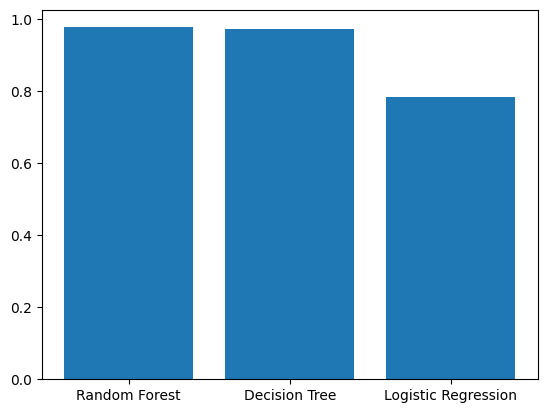

In [31]:
plt.bar(['Random Forest', 'Decision Tree', 'Logistic Regression'],
		[rf_accuracy, tree_accuracy, logestic_accuracy],)